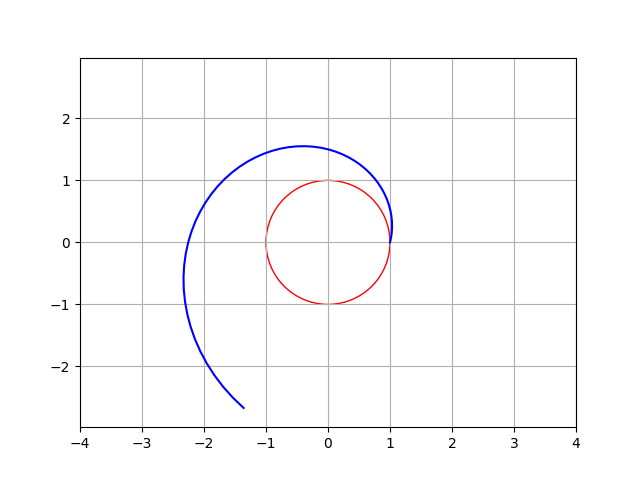

In [1]:
#------------------------------------------------------------
# Understanding the log curve formula
#
# The log curve formula is: r(i) = a * exp(k * theta(i))
#
# where:
#   r(i) is the distance from the center of the log curve 
#       to the curve at angle theta(i)
#   a scales the distance of the curve from the center
#   k is the curvature of the curve, found by: cos(angle)
#       k = cos(0°) is a straight line
#       k = cos(90°) is a circle
#       So for a tighter, change the angle to a higher value
#   theta(i) is the angle from the x axis to the point on 
#       the curve
#
# P(r, theta) is a polar coordinate
# Convert to Cartesian coordinates:
# P(x, y) = (r * cos(theta), r * sin(theta))
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, basic_log_curve_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
basic_log_curve_plot.axis('equal') # Set the aspect ratio of the plot to be equal
basic_log_curve_plot.set_xlim(-4, 4) # Set the limits of the plot
basic_log_curve_plot.set_ylim(-4, 4) # Set the limits of the plot
basic_log_curve_plot.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta(i))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
basic_log_curve_plot.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta(i))
    y = r(i) * math.sin(theta(i))
    points.append([x, y])

basic_log_curve_plot.plot([x for x, y in points], [y for x, y in points], 'b-')


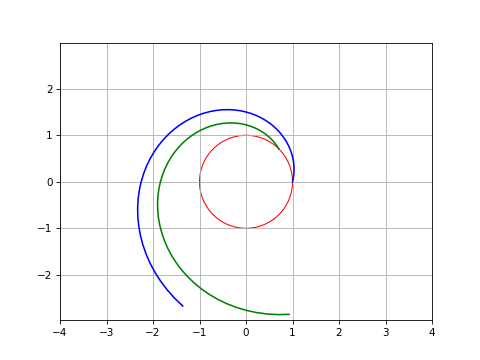

In [2]:
#------------------------------------------------------------
# 
#   Altering the graph - rotate the curve
#
#  To rotate the curve, theta will need an offset added to it
#  However, you can't just directly add it like this
#  r = a * exp(k * (theta + offset))
#
#  Let's consider it's the exponent that we are changing when
#  we add an offset to theta
#  r = a * exp(k * (theta + offset))
#  This would change the value of r, which we don't want.
#
#  This can be rewritten as:
#  r = a * exp(k * theta + k * offset)
#  If we don't want to change the equation:
#  k * offset - k * offset = 0
#  So we can add: 
#  k * theta + k * offset - k * offset
#  Do some grouping:
#  k * (theta + offset) - k * offset
#  Because we are working with exponents, this is what we 
#  end up with:
#  exp(k * (theta + offset))exp(- k * offset)
#
#  So to rotate the curve, we need to do this:
#  r = a * exp(k * (theta + offset)) * exp(- k * offset)
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, shifted_log_curve = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
shifted_log_curve.axis('equal') # Set the aspect ratio of the plot to be equal
shifted_log_curve.set_xlim(-4, 4) # Set the limits of the plot
shifted_log_curve.set_ylim(-4, 4) # Set the limits of the plot
shifted_log_curve.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta(i))

def shifted(i):
    return a * math.exp(k * (theta(i) + math.radians(45))) * math.exp(-k * math.radians(45))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
shifted_log_curve.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
shifted_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta(i))
    y = r(i) * math.sin(theta(i))
    points.append([x, y])
    x_ = shifted(i) * math.cos(theta(i) + math.radians(45))
    y_ = shifted(i) * math.sin(theta(i) + math.radians(45))
    shifted_points.append([x_, y_])

shifted_log_curve.plot([x for x, y in points], [y for x, y in points], 'b-')
shifted_log_curve.plot([x for x, y in shifted_points], [y for x, y in shifted_points], 'g-')

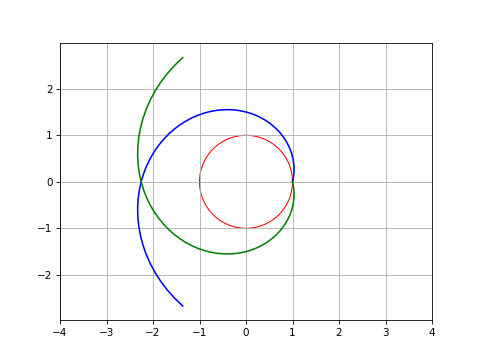

In [11]:
#------------------------------------------------------------
# 
#   Altering the graph - mirror the curve
#
#  To change the direction of travel around a curve, in
#  polar coordinates, you simply change the sign of theta
#  -(theta)
#  However, for our forumla:
#  r = a * exp(k * theta), if you change the sign of theta
#  you will change the value of r.
#
#  If we (again) consider the exponent:
#  k*theta, to change the direction of travel without 
#  changing the value of r, we need to do this:
#  k * theta + 0
#  0 = 2k * theta - 2k * theta
#  So we can add:
#  k * theta + 2k * theta - 2k * theta
#  Do some simplifying
#  (-2k * theta + k * theta) + (2k * theta)
#  (-k * theta) + (2k * theta)
#  Which brings us to:
#  r = a * exp(-k * theta) * exp(2k * theta)
#
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, mirrored_log_curve = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
mirrored_log_curve.axis('equal') # Set the aspect ratio of the plot to be equal
mirrored_log_curve.set_xlim(-4, 4) # Set the limits of the plot
mirrored_log_curve.set_ylim(-4, 4) # Set the limits of the plot
mirrored_log_curve.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta(i))

def mirrored(i):
    return a * math.exp(-k * theta(i)) * math.exp(2 * k * theta(i))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
mirrored_log_curve.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
mirrored_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta(i))
    y = r(i) * math.sin(theta(i))
    points.append([x, y])
    x_ = mirrored(i) * math.cos(-theta(i))
    y_ = mirrored(i) * math.sin(-theta(i))
    mirrored_points.append([x_, y_])

mirrored_log_curve.plot([x for x, y in points], [y for x, y in points], 'b-')
mirrored_log_curve.plot([x for x, y in mirrored_points], [y for x, y in mirrored_points], 'g-')

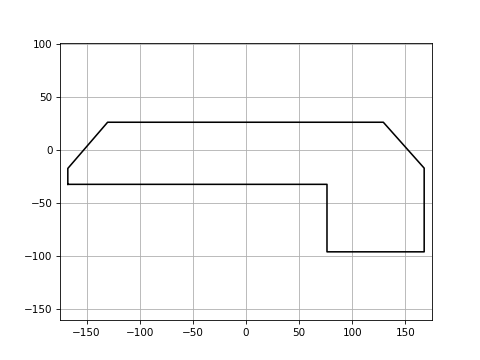

In [3]:
#------------------------------------------------------------
# 
#   Set show the table top on the graph
#
#------------------------------------------------------------
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, tabletop = plt.subplots()
plt.rcParams['figure.dpi'] = 150 # Set this to make the plot bigger
tabletop.axis('equal') # Set the aspect ratio of the plot to be equal
tabletop.set_xlim(-175, 175) # Set the limits of the plot
tabletop.set_ylim(-110, 50) # Set the limits of the plot
tabletop.grid(True) # Turn on the grid

#------------------------------------------------------------
# Create the table top
#------------------------------------------------------------
# Points for the table top, values are in cm
# I copied these from the project
A = (-167.64, -32.385)
B = (-167.64, -17.414)
C = (-130.203, 26.035)
D = (129.195, 26.035)
E = (167.64, -17.145)
F = (167.64, -95.885)
G = (76.20, -95.885)
H = (76.20, -32.385)

# Draw the table top
# Used (-) on the x axis to flip the table top on the x axis


def plot_table_on_chart(chart):
    chart.plot(
        [A[0], B[0], C[0], D[0], E[0], F[0], G[0], H[0], A[0]],
        [A[1], B[1], C[1], D[1], E[1], F[1], G[1], H[1], A[1]],
        'k-')
    
plot_table_on_chart(tabletop)

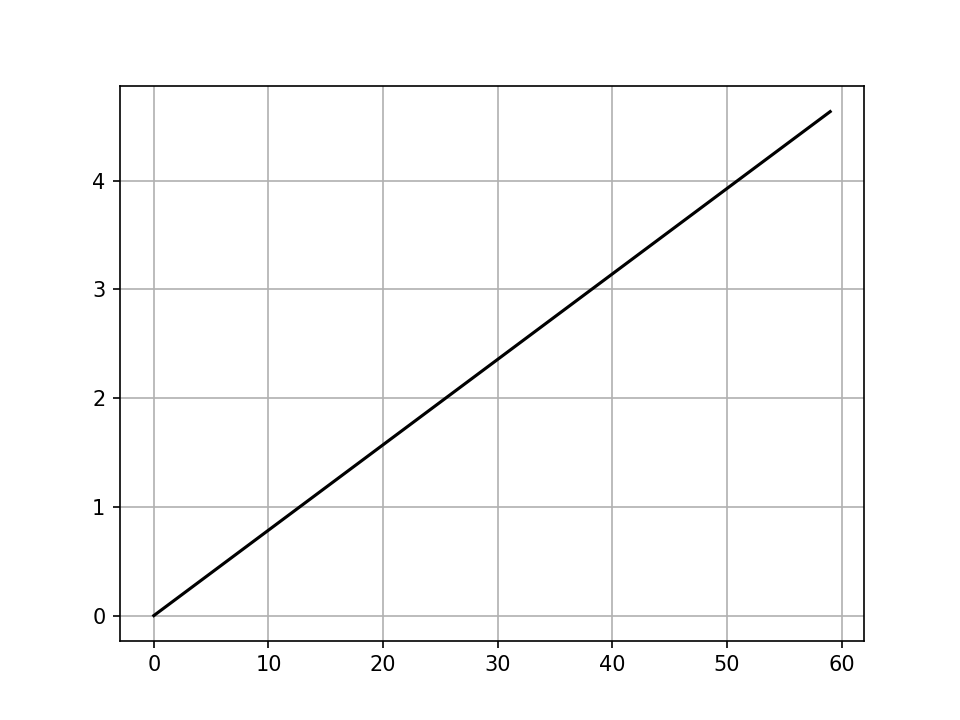

In [4]:
#------------------------------------------------------------
# 
#   Get theta based on the current iteration
#
#------------------------------------------------------------

#------------------------------------------------------------
# Values should be treated as if they are in cm to avoid
# confusion when moving this over to the Fusion360 script.
#------------------------------------------------------------

#------------------------------------------------------------
# Setup the plotting tools
#------------------------------------------------------------

fig, theta_from_iteration_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
theta_from_iteration_plot.grid(True) # Turn on the grid

# How far we want the curves to start from the center
# It seems that setting this to 0 is the ideal option, we can
# always adjust the curve to start at a different point
radius_from_center = 0

# Because we are using polar coordinates to derive the curve,
# we need to find the distance from the center point.  That
# distance is calculated using the equation p = a * e^(k*theta)
# Theta is going to change, based on the number of points we want.
# To standardize, I made this linear function.
def theta_from_coordinate_counter(coordinate_counter):
    return coordinate_counter * math.pi / 40

thetas_for_plotting = []
for i in range(0, 60):
    thetas_for_plotting.append(theta_from_coordinate_counter(i))
theta_from_iteration_plot.plot(thetas_for_plotting, 'k-')

In [5]:
#------------------------------------------------------------
# 
#   Scaling the distance from the center after the exp()
#
#------------------------------------------------------------

#------------------------------------------------------------
# Values should be treated as if they are in cm to avoid
# confusion when moving this over to the Fusion360 script.
#------------------------------------------------------------

# Returns the scaling value for the distance scaling
# I could consider making this dynamic.
def scale_distance():
    return 1.1

1.19175359259421


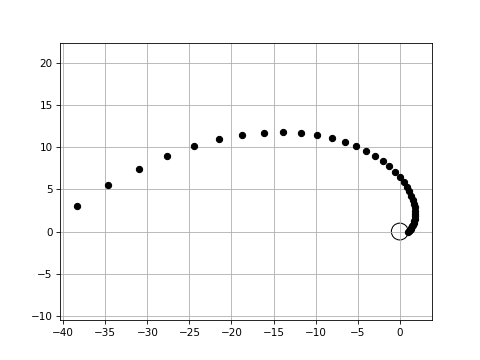

In [6]:
#------------------------------------------------------------
# 
#   Pitch angle drives how tight the curve is.
#
# if k = 90, we get a circle
# as k approaches 0, the curve becomes more linear
# So, for a tighter curve, we want to approach 90
# For a more linear curve, we want to approach 0
#
# The plot indicates the severity of the curve compared to a
# circle.  The circle is drawn in the plot to give a visual
#------------------------------------------------------------

fig, pitch_angle_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
pitch_angle_plot.axis('equal') # Set the aspect ratio of the plot to be equal
pitch_angle_plot.grid(True) # Turn on the grid

# Returns the pitch angle of the log curve
def pitch_angle():
    angle = 40
    return 1/math.tan(math.radians(angle))

print(pitch_angle())

points_for_plotting = []
for i in range(0, 40):
    theta = theta_from_coordinate_counter(i)
    distance = math.exp(pitch_angle() * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    pitch_angle_plot.plot(x, y, 'ko')

circle = plt.Circle((0,0), 1, color='k', fill=False)
pitch_angle_plot.add_artist(circle)